# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

De warmtecapaciteit voor een stof wordt gegeven door 
$$
c = \frac{Q}{m\Delta T}
$$
hierbij is Q de aangevoerde of afgevoerde warmte van het systeem in J, m de massa in kg en het temperatuurverschil \Delta T in K. In dit experiment wordt de warmte geleverd door een elektrisch verwarmingselement met een vermogen P dus 
$$ c = \frac{Pt}{m\Delta T} $$

Het vermogen wordt gegeven door $P = UI = \frac{U^2}{R}$ dus

$ c = \frac{U^2 t}{mR\Delta T} $

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```
- vul de schaal met 600 mL water
- meet de begintemperatuur van het water en laat de thermometer in het water zitten
- doe het verwarmingselement in het water
- doe de voedingsbron aan op maximaal 20 V (zodat vermogen maximaal 40 W is) en
- zet de timer aan, noteer de spanning
- per 10 seconden noteer de temperatuur en tijd gedurende 4 minuten
- zet de roerder aan zodat de warmte goed verspreid
- noteer de eindtijd 

gekregen procedure:
1)	Meet het gewicht van de maatbeker
2)	Zet het gewicht van de weegschaal op 0 terwijl de maatbeker erop staat
3)	Vul de maatbeker met water
4)	Meet het gewicht van de gevulde maatbeker
5)	Zet de thermometer in de maatbaker
6)	Verwarm de maatbeker door 40 W door de weestand te laten lopen voor 4-5 minuten. (zet de roerder aan)
7)	Lees per 15 seconden de thermometer af terwijl het opwarmt.
8)	Schrijf deze waardes op
9)	Na het experiment weeg de maatbeker inclusief water opnieuw


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Hier de data en de analyse
# m1 =        #massa schaal zonder water [kg]
# m2 =        #massa schaal met water [kg]
#massa van schaal hebben we niet gemeten

m_water = 592.7e-3 #kg

V_bron =   20 #V
I_bron = 2.05 #A
R = 10      #Ohm

T = np.array([18.8,19.2,19.4,19.7,19.8,20.2,20.3,20.5,20.6,20.8,21.1,21.3,21.6,21.7,22.1,22.2,22.6,22.8,23.0,23.2,23.5])+273.15 #gemeten temperatuur [K]
t = np.arange(0,301,15) #gemeten tijd in s
print(t)

T1 = T[0] #begintemperatuur [K]
T2 = T[-1] #eindtemperatuur [K] 
delta_T = T2 - T1


[  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300]


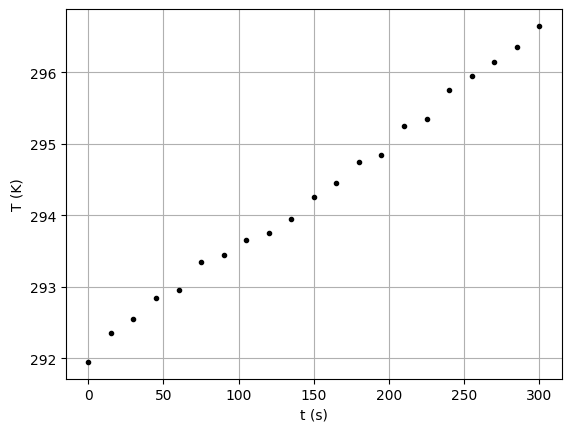

In [4]:
#plot data
plt.figure()

plt.plot(t,T,"k.")

plt.xlabel("t (s)")
plt.ylabel("T (K)")

plt.grid()
plt.show()

In [5]:
#methode 1: direct berekenen

c = V_bron**2 * t[-1]/ (m_water*R*(delta_T)) 

print(f"De soortelijke warmte van water is {c:.2f} \u00B1 J/kg*T")

De soortelijke warmte van water is 4307.73 ± J/kg*T


De soortelijke warmte van water is 2943.615 ± 


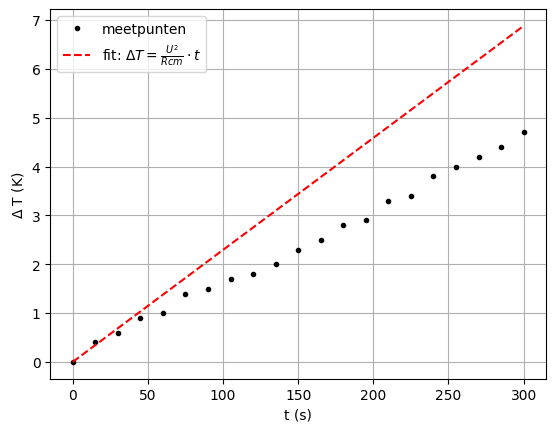

In [6]:
#methode 2: fitfunc

def fitfunc(t, a):
    return a*t

popt, pcov = curve_fit(fitfunc,t,delta_T)

a = popt[0]
u_a = pcov[0,0]

c = V_bron**2 / (R * m_water * a) # soortelijke warmte uitrekenen
# u_c =           #onzekerheid in soortelijke warmte berekenen

print(f"De soortelijke warmte van water is {c:.3f} \u00B1 ") #aantal floating points aanpassen op de onzekerheid

#define fit functions
t_fit = np.linspace(min(t),max(t),1000)
y_fit = fitfunc(t_fit,*popt)

#define delta T array
dT = np.array([])
for i in range(len(T)):
    dT = np.append(dT,T[i]-T[0])


#plot data with fit
plt.figure()

plt.plot(t,dT,"k.",label="meetpunten")
plt.plot(t_fit,y_fit,"r--",label = r"fit: $\Delta T = \frac{U^2}{Rcm}\cdot t$")

plt.xlabel("t (s)")
plt.ylabel(r"$\Delta$ T (K)")

plt.legend()
plt.grid()
plt.show()
# Sla figuren op met  
# 



# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.